In [ ]:
import pandas as pd

In [4]:
import os

arquivo = "Planilha_desenvolvimento.xlsx"
print(os.path.exists(arquivo))  # Deve retornar True se o Python encontrar


True


In [5]:
#Importando dados de abas específicas de arquivos do excel
df_desenvolvimento = pd.read_excel("Planilha_desenvolvimento.xlsx", sheet_name="País - Desenvolvimento")
df_desenvolvimento.head()

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($)
0,Afeganistão,0.510,5.0,600
1,Albânia,0.795,12.0,5500
2,Argélia,0.748,10.0,4000
3,Andorra,0.858,13.5,42000
4,Angola,0.581,6.0,3000


In [6]:
#Importando dados de abas específicas de arquivos do excel
df_pais_continente = pd.read_excel("Planilha_desenvolvimento.xlsx", sheet_name="País - Continente")
df_pais_continente.head()

,País,Continente
0,Afeganistão,Ásia
1,Albânia,Europa
2,Argélia,África
3,Andorra,Europa
4,Angola,África


In [7]:
#Convertendo texto para minúsculas
df_pais_continente['País'] = df_pais_continente['País'].str.lower()
df_desenvolvimento['País'] = df_desenvolvimento['País'].str.lower()

df_desenvolvimento['País'].head()

0    afeganistão
1        albânia
2        argélia
3        andorra
4         angola
Name: País, dtype: object

In [8]:
#Remoção de pontos
df_pais_continente['País'] = df_pais_continente['País'].str.replace(".","")
df_desenvolvimento['País'] = df_desenvolvimento['País'].str.replace(".","")
df_desenvolvimento

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($)
0,afeganistão,0.510,5.0,600
1,albânia,0.795,12.0,5500
2,argélia,0.748,10.0,4000
3,andorra,0.858,13.5,42000
4,angola,0.581,6.0,3000
...,...,...,...,...
187,venezuela,0.711,9.0,6000
188,vietnã,0.704,8.5,3500
189,iêmen,0.470,4.5,1000
190,zâmbia,0.584,6.5,1600


In [9]:
#Remoção de espaços excessivos
#Strip -> tira os espaços das extremidades do texto
#Split -> Transforma o texto em uma lista e tira os espaços do meio do texto juntamente com o Join()

def remove_espacos_excessivos(nome):
    nome_primeiro_ajuste = nome.strip()

    nome_ajustado = " ".join(nome_primeiro_ajuste.split())

    return nome_ajustado

In [10]:
#Apply -> aplica uma mesma função 

df_pais_continente['País'] = df_pais_continente['País'].apply(remove_espacos_excessivos)
df_desenvolvimento['País'] = df_desenvolvimento['País'].apply(remove_espacos_excessivos)

In [11]:
#Cruzando dados de dataframes

df_completo = df_desenvolvimento.merge(right=df_pais_continente, on='País', how='left')

In [12]:
df_completo.head()

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($),Continente
0,afeganistão,0.510,5.0,600,Ásia
1,albânia,0.795,12.0,5500,Europa
2,argélia,0.748,10.0,4000,África
3,andorra,0.858,13.5,42000,Europa
4,angola,0.581,6.0,3000,África


In [13]:
#Encontrando valores nulos na coluna continente
df_completo[df_completo['Continente'].isna()]

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($),Continente
111,estados federados da micronésia,0.628,8.0,3000,NaN


In [14]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   País                          192 non-null    object 
 1   IDH                           192 non-null    float64
 2   Anos de escolaridade (médio)  192 non-null    float64
 3   PIB per Capita ($)            192 non-null    int64  
 4   Continente                    191 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 7.6+ KB


In [15]:
#df_completo['Continente'].fillna('Oceania', inplace=True)
df_completo.loc[:, 'Continente'] = df_completo['Continente'].fillna('Oceania')

In [16]:
df_completo['Continente'].isna().sum()
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   País                          192 non-null    object 
 1   IDH                           192 non-null    float64
 2   Anos de escolaridade (médio)  192 non-null    float64
 3   PIB per Capita ($)            192 non-null    int64  
 4   Continente                    192 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 7.6+ KB


In [17]:
import matplotlib.pyplot as plt

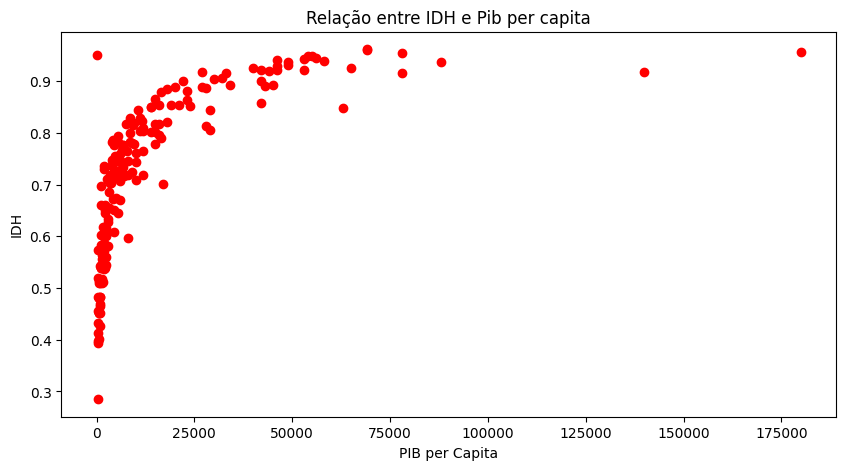

In [18]:
#Plotar gráfico
#Criar uma figura com tamanho específico
plt.figure(figsize=(10,5))

#Gráfico de dispersão do Pib per capita contra o IDH
plt.scatter(
    df_completo['PIB per Capita ($)'], #eixo x
    df_completo['IDH'], #eixo y
    color = 'r',
)

#Adicionando título e rótulos dos eixos
plt.title('Relação entre IDH e Pib per capita')
plt.xlabel('PIB per Capita')
plt.ylabel('IDH')

#Exibe o gráfico
plt.show()

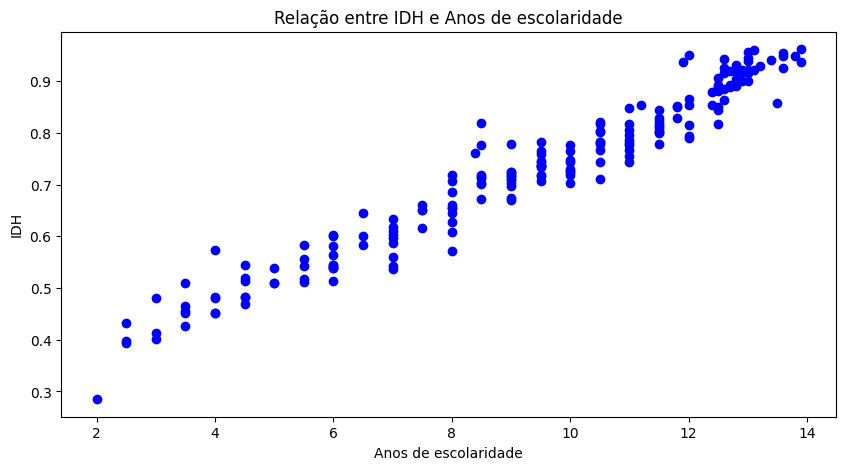

In [19]:
#Plotar gráfico
#Criar uma figura com tamanho específico
plt.figure(figsize=(10,5))

#Gráfico de dispersão do Anos de escolaridade contra o IDH
plt.scatter(
    df_completo['Anos de escolaridade (médio)'], #eixo x
    df_completo['IDH'], #eixo y
    color = 'b',
)

#Adicionando título e rótulos dos eixos
plt.title('Relação entre IDH e Anos de escolaridade')
plt.xlabel('Anos de escolaridade')
plt.ylabel('IDH')

#Exibe o gráfico
plt.show()

In [20]:
#Calculando média global do IDH
media_idh_global = df_completo['IDH'].mean()
media_idh_global

np.float64(0.72225)

In [21]:
#Agrupas IDHs por continente
"""df_completo.groupby(['Continente'])['IDH']"""

df_completo.groupby(['Continente'])['IDH'].count()

Continente
América    35
Europa     43
Oceania    14
África     54
Ásia       46
Name: IDH, dtype: int64

In [22]:
#Média do IDH por continente
media_por_continente = df_completo.groupby(['Continente'])['IDH'].mean().to_frame().reset_index()

In [23]:
#Ordenando de maneira decrescente
media_por_continente = media_por_continente.sort_values(by='IDH', ascending=False)

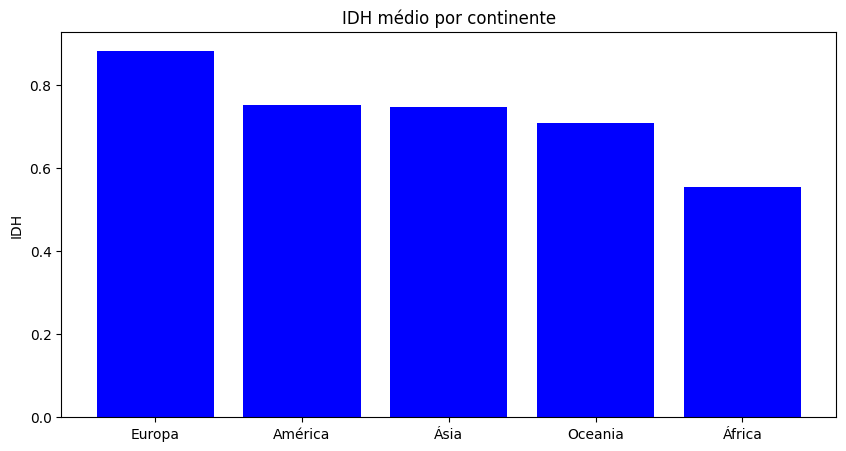

In [24]:
#Plotar gráfico
#Criar uma figura com tamanho específico
plt.figure(figsize=(10,5))

#Gráfico de barras da Media do IDH por continentes 
plt.bar(
    media_por_continente['Continente'], #eixo x
    media_por_continente['IDH'], #eixo y
    color = 'b',
)

#Adicionando título e rótulos dos eixos
plt.title('IDH médio por continente')
plt.ylabel('IDH')

#Exibe o gráfico
plt.show()

In [25]:
numero_paises_continente = df_completo.groupby(['Continente'])['País'].count().to_frame().reset_index()
numero_paises_continente.head()

,Continente,País
0,América,35
1,Europa,43
2,Oceania,14
3,África,54
4,Ásia,46


In [26]:
#Mostrar somente países acima da média global

paises_acima_media_global = df_completo[df_completo['IDH'] > media_idh_global]
paises_acima_media_global

,País,IDH,Anos de escolaridade (médio),PIB per Capita ($),Continente
1,albânia,0.795,12.0,5500,Europa
2,argélia,0.748,10.0,4000,África
3,andorra,0.858,13.5,42000,Europa
5,antígua e barbuda,0.778,11.5,15000,América
6,argentina,0.845,12.5,10500,América
...,...,...,...,...,...
181,reino unido,0.922,12.9,46000,Europa
182,estados unidos,0.926,13.6,65000,América
183,uruguai,0.817,11.5,16000,América
184,uzbequistão,0.736,9.5,1900,Ásia


In [27]:
#Mostra somente a quantidade de países acima da média global em cada continente
numero_paises_acima_media = paises_acima_media_global.groupby(['Continente'])['País'].count().to_frame().reset_index()
numero_paises_acima_media

,Continente,País
0,América,24
1,Europa,42
2,Oceania,4
3,África,6
4,Ásia,28


In [28]:
#Percentual de países acima da média global
numero_paises_acima_media['Percentual acima da média'] = (numero_paises_acima_media['País']/numero_paises_continente['País'])*100

#Cometi um erro de fazer duas colunas com as mesmas informações, e resolvi dessa forma:
#numero_paises_acima_media = numero_paises_acima_media.drop(columns=['Percentual_acima_média'])
numero_paises_acima_media.head()

,Continente,País,Percentual acima da média
0,América,24,68.571429
1,Europa,42,97.674419
2,Oceania,4,28.571429
3,África,6,11.111111
4,Ásia,28,60.869565


In [29]:
#Ordenando de maneira decrescente
numero_paises_acima_media = numero_paises_acima_media.sort_values(by='Percentual acima da média', ascending=False)
numero_paises_acima_media.head()

,Continente,País,Percentual acima da média
1,Europa,42,97.674419
0,América,24,68.571429
4,Ásia,28,60.869565
2,Oceania,4,28.571429
3,África,6,11.111111


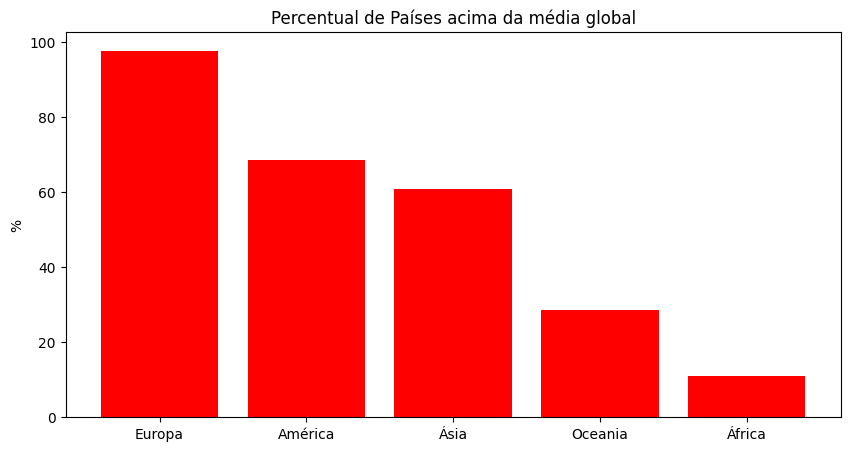

In [30]:
#Plotar gráfico
#Criar uma figura com tamanho específico
plt.figure(figsize=(10,5))

#Gráfico de barras da Media do IDH por continentes 
plt.bar(
    numero_paises_acima_media['Continente'], #eixo x
    numero_paises_acima_media['Percentual acima da média'], #eixo y
    color = 'r',
)

#Adicionando título e rótulos dos eixos
plt.title('Percentual de Países acima da média global')
plt.ylabel('%')

#Exibe o gráfico
plt.show()